In [1]:
import wisps
import splat
import numpy as np
import matplotlib.pyplot as plt
from wisps.data_analysis import selection_criteria as sel_crt
import pandas as pd
%matplotlib inline

In [2]:
wisps.datasets.keys()

dict_keys(['spex', 'stars', 'candidates', 'traing_set', 'manjavacas', 'schneider', 'rf_classified'])

In [3]:
#data=wisps.datasets['stars'].reset_index(drop=True)
data=wisps.Annotator.reformat_table(pd.read_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='all_phot_spec_data'))

In [4]:
to_use= pd.read_pickle(wisps.OUTPUT_FILES+'/best_indices_to_use.pkl')

In [5]:
crts=sel_crt.crts_from_file()

In [6]:
to_use

{'H-cont/H_2O-1 CH_4/J-Cont': ['L0-L5'],
 'H-cont/H_2O-1 H_2O-2/J-Cont': ['L5-T0'],
 'CH_4/H_2O-1 H_2O-2/J-Cont': ['T0-T5'],
 'H_2O-2/J-Cont CH_4/H-Cont': ['Y dwarfs'],
 'H_2O-1/J-Cont CH_4/H-Cont': ['T5-T9'],
 'H-cont/J-Cont CH_4/J-Cont': ['subdwarfs']}

In [28]:
target='Y dwarfs'

In [29]:
idx=[crts[k] for k in to_use.keys() if to_use[k][0]==target][0]

In [30]:
#idx

In [31]:
b=[x for x in idx.shapes if x.shape_name==target][0]

In [32]:
df=wisps.Annotator.reformat_table(data[[idx.xkey, idx.ykey]]).applymap(np.float)

In [33]:
len(df), len(b.select(df))

(270436, 114)

In [34]:
selected=b.select(df)

In [35]:
sldf=wisps.Annotator.reformat_table(data.iloc[selected.index])

In [40]:
#sds=sldf[(sldf.snr1>10.) & (sldf.f_test>0.5) &  (sldf.spt.apply(splat.typeToNum)>= splat.typeToNum(target[:2])-1) ]
sds=sldf[(sldf.snr1>1.) & (sldf.f_test>0.3)   ]
#sds=sldf[(sldf.snr1>3.)]

In [41]:
len(sds)

17

In [17]:
stop

NameError: name 'stop' is not defined

In [42]:
#fig, ax=plt.subplots()
#b.plot(ax=ax)
#idx.plot(ax=ax,  highlight='subdwarfs', xlim=[0.5, .7], ylim=[0.5, 0.7])
#ax.legend().set_visible(False)
#ax.scatter(sds[idx.xkey], sds[idx.ykey], color='gray')

In [43]:
#sps=[wisps.Source(name=x) for x in sds.Names.str.replace('.1D.ascii', '').apply(lambda x : x.strip())]
sps=[wisps.Source(name=x) for x in sds.grism_id]


In [44]:
import os

In [45]:
SPECTRA_PATH=os.path.dirname(wisps.WISP_PATH.split('wisps')[0]+('wisps')+'//spectra//')

plotting standard for par32-00075
plotting standard for par58-00112
plotting standard for par134-00268
plotting standard for par354-10003
plotting standard for par422-00461
plotting standard for cosmos-25-G141_19796
plotting standard for cosmos-03-G141_15519
plotting standard for aegis-10-G141_14031
plotting standard for aegis-24-G141_23713
plotting standard for uds-27-G141_28617
plotting standard for goodsn-43-G141_05063
plotting standard for goodss-31-G141_27473
plotting standard for goodsn-27-G141_31042
plotting standard for goodsn-25-G141_23950
plotting standard for goodss-01-G141_45889
plotting standard for goodsn-45-G141_14885
plotting standard for goodss-05-G141_02118


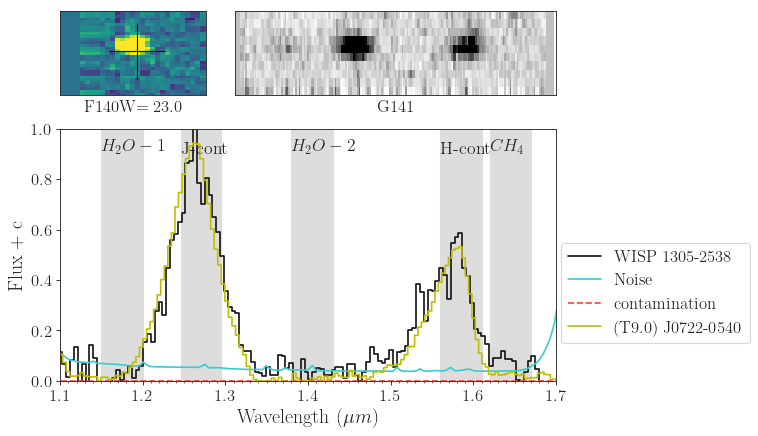

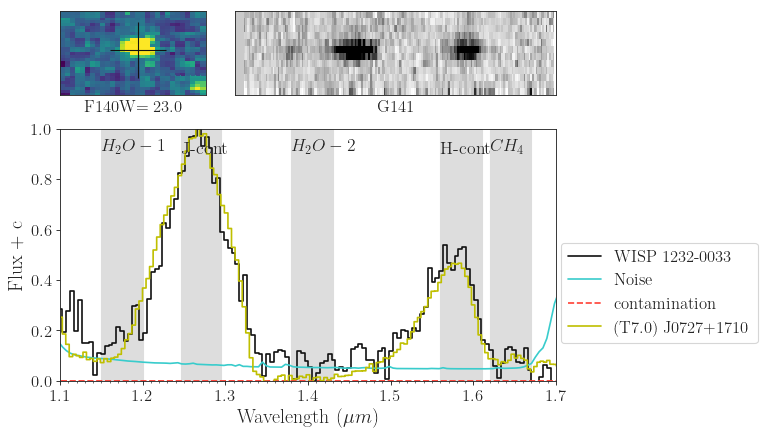

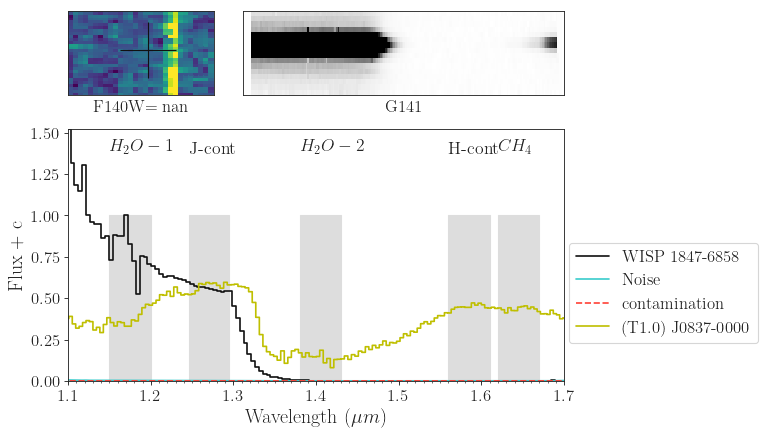

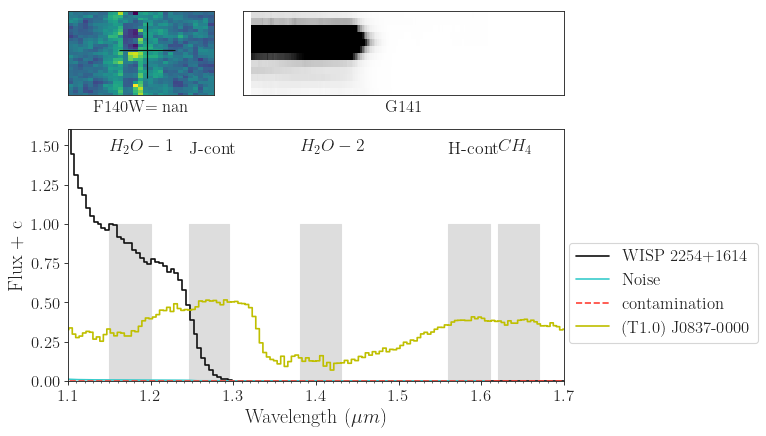

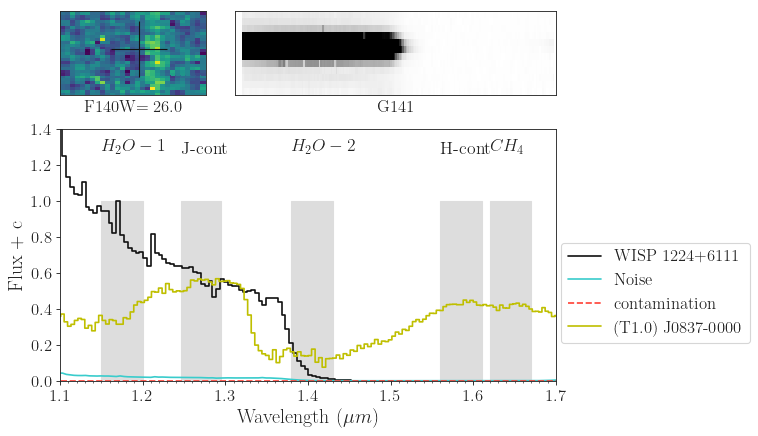

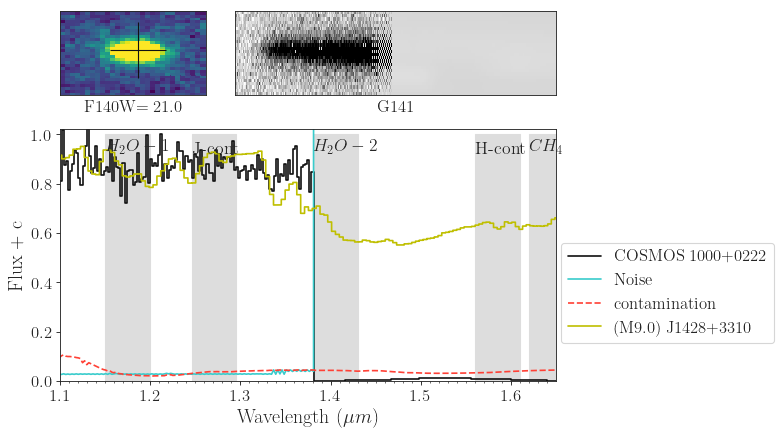

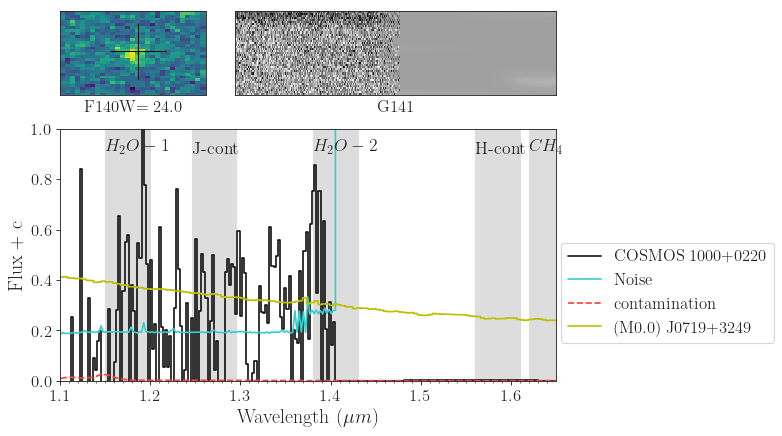

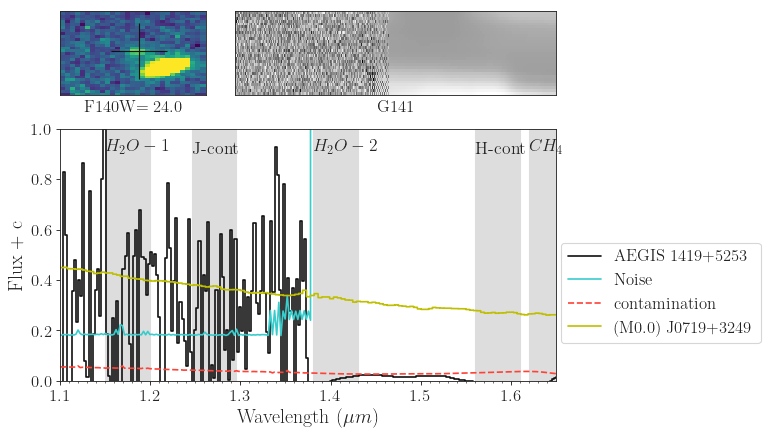

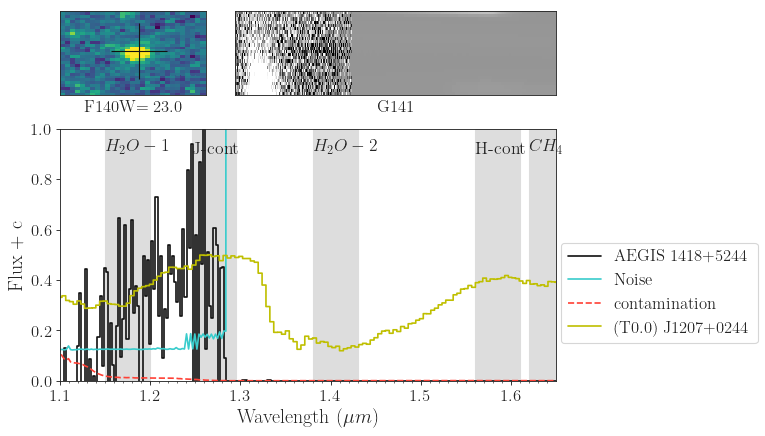

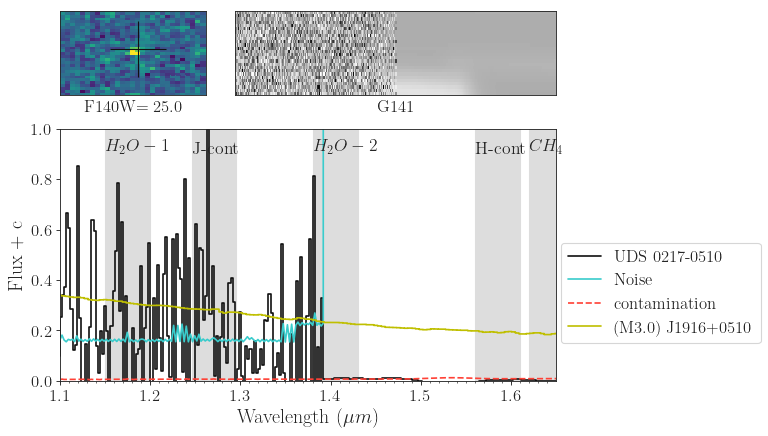

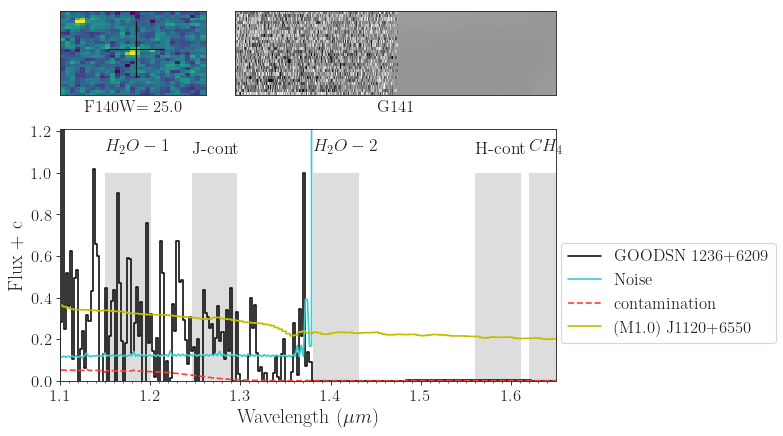

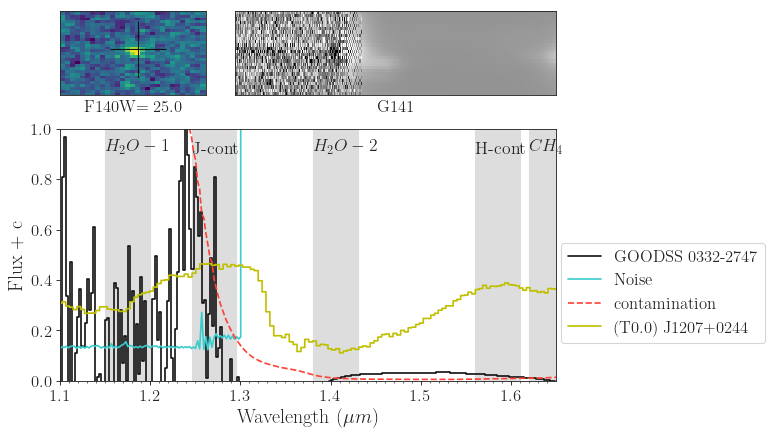

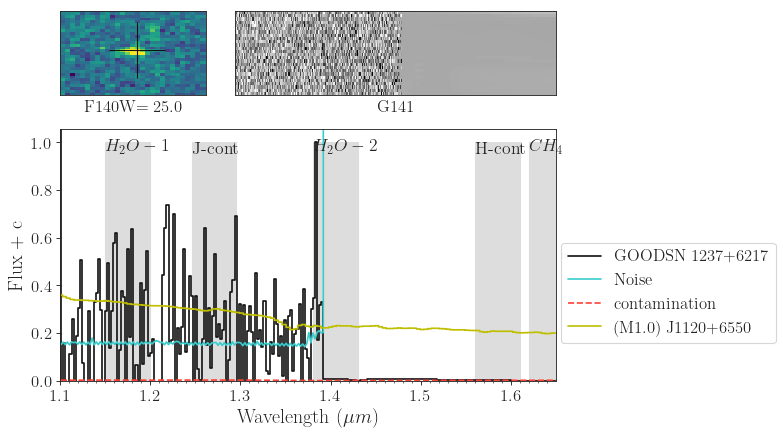

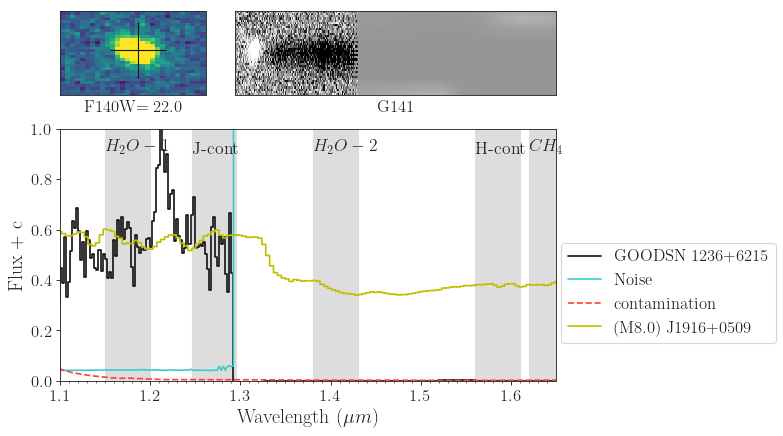

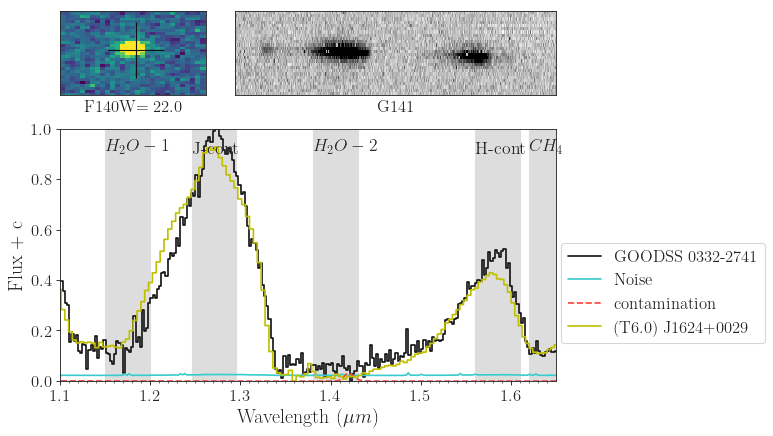

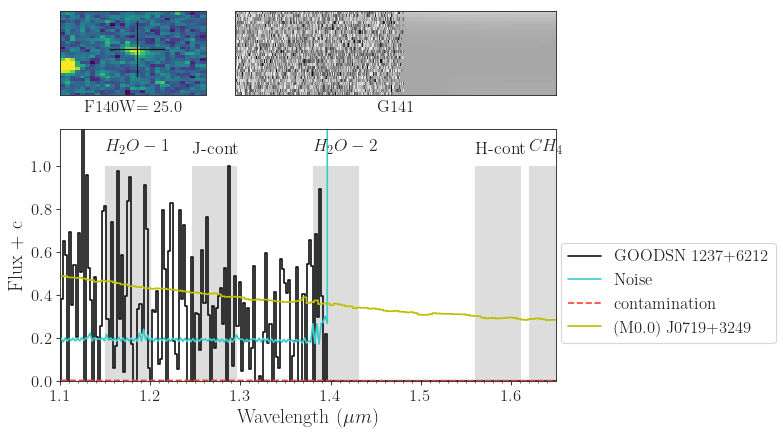

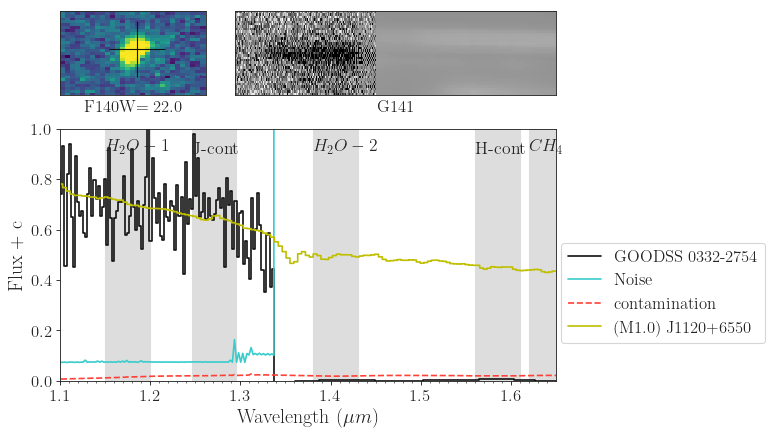

In [46]:
for s in sps:
    fname=SPECTRA_PATH+'/indices/'+s.name.replace('-', '_')+'.jpeg'
    s.normalize(waverange=[1.15, 1.65])
    #splat.classifyByStandard(s.splat_spectrum, std_class='dwarf', plot=True, 
    #                         fit_ranges=[[1.15, 1.65]], xrange=[1.15, 1.65], yrange=[0., 1.] )
    s.plot(save=True, filename=fname.strip() )